<a href="https://colab.research.google.com/github/hartmann-pereira/D/blob/main/Data_Analysis_and_Model_prediction_Loan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all my libraries to be able to manipulate data


*   The dataset is available at my github following the url 
*   Calling the dataframe loans and showing a bit of the data to be familiar



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/hartmann-pereira/D/main/loan_data.csv'

In [3]:
loans = pd.read_csv(url)

In [4]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Statistical data analysis
* This section outlines the different statistical analyses performed

## Descriptive analysis (univariate analysis)
* analysis for attributes that are common, numerical,
categorical, and textual

In [5]:
# Common atribute should include data type and missing value analysis

loans.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

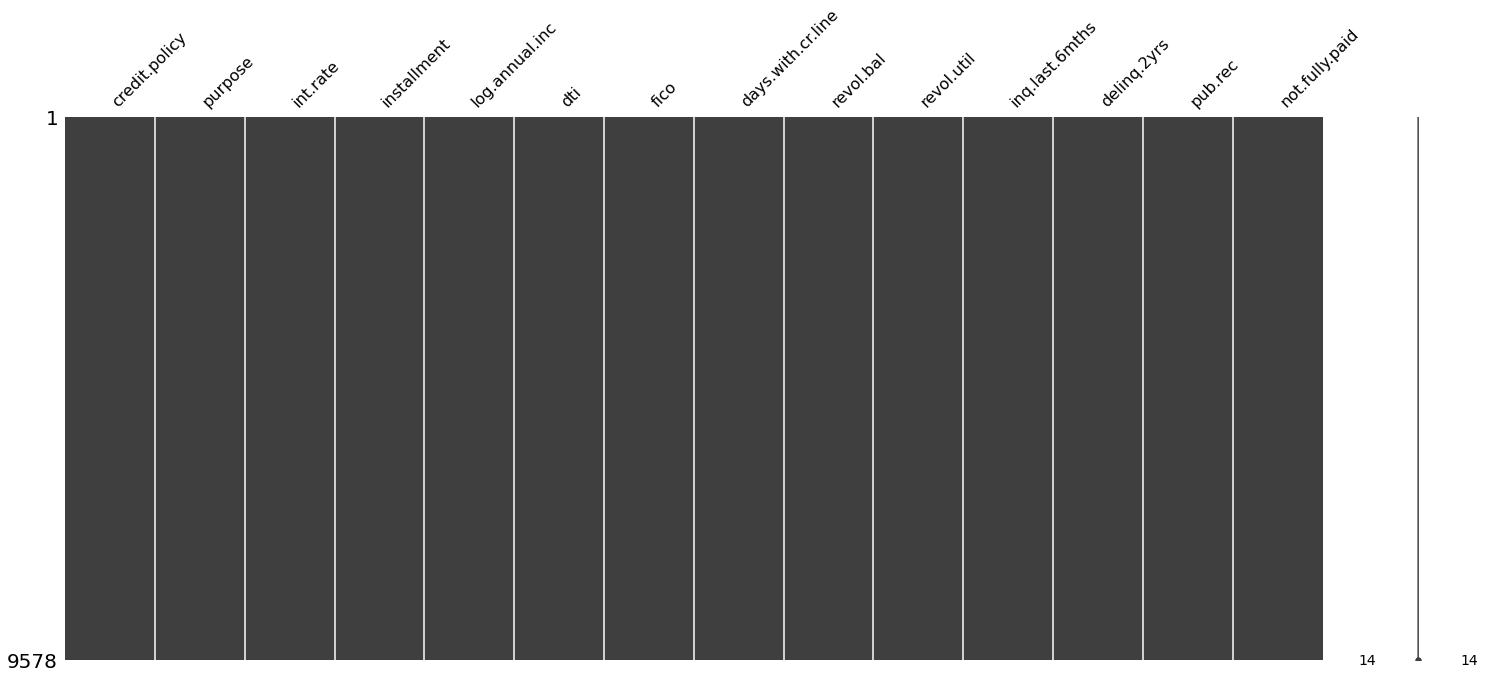

In [6]:
# Using the msno library we can quickly see that there are no missing values in our dataset
msno.matrix(loans)

In [7]:
# Numerical atributes require a deeper analysis such as 
# Quantile statistics
# Descriptive statistics
# Distribution histogram

loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
#Distribution Histogram of the based on the appropriate number of bins range_x='[600, loans['fico'].max()]'
bin_count=(900-600)/10
px.histogram(loans, x='fico', marginal='violin', nbins=int(bin_count), range_x=[600, loans['fico'].max()])

Text(0.5, 0, 'FICO')

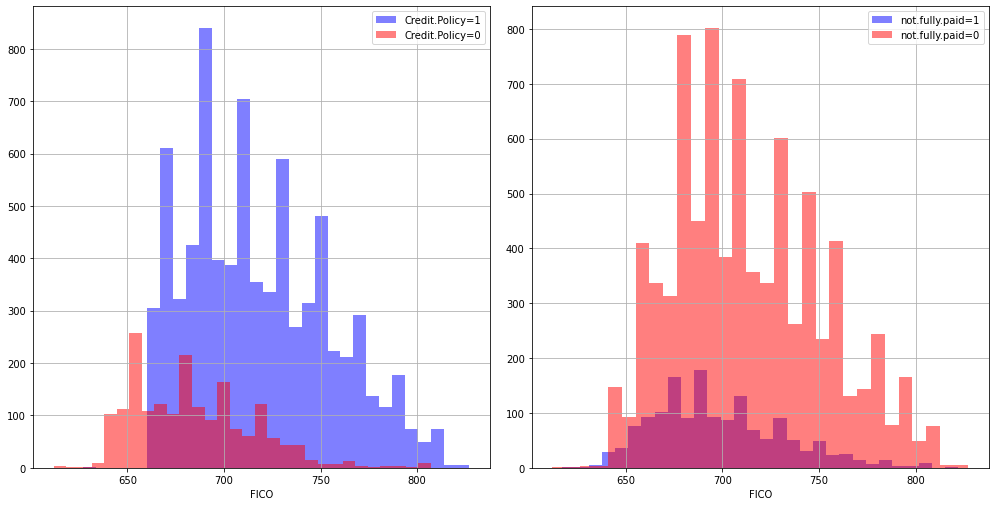

In [9]:
#Now using matplotlib to build a histogram of two FICO distributions on top of each other, one for each credit.policy

#Setting the size and subplots for the image, I want a figure with 1 row and 2 cols and (14,7)size
fig, ax = plt.subplots(1, 2, figsize=(14,7))
fig.tight_layout()

#First plot
plt.subplot(1, 2, 1)
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

#Second plot
plt.subplot(1, 2, 2)

loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')



In [10]:
#let's see the complete information of who has the highest fico score and lowest fico score
highest_fico_info = loans[loans['fico'] == loans['fico'].max()]

lowest_fico_info = loans[loans['fico'] == loans['fico'].min()]

In [11]:
highest_fico_info.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1613,1,home_improvement,0.1051,390.09,11.918391,2.92,827,8763.0,84236,4.6,0,0,0,0


In [12]:
lowest_fico_info

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
7781,0,educational,0.1754,43.11,9.169518,8.38,612,659.0,546,47.6,0,1,0,0
7957,0,debt_consolidation,0.1786,88.41,10.915088,9.62,612,1230.0,1190,119.0,15,0,0,0


In [13]:
# We can further develop the understanding of this dataset doing a Categorical analysis using cardinality and unique counts

loans['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [14]:
loans['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [15]:
pd.purpose_count=loans['purpose'].value_counts()

In [16]:
fig = px.bar(pd.purpose_count)
fig.show()

In [17]:
loans['purpose'].value_counts(normalize=True)

debt_consolidation    0.413134
all_other             0.243370
credit_card           0.131760
home_improvement      0.065671
small_business        0.064627
major_purchase        0.045625
educational           0.035811
Name: purpose, dtype: float64

In [18]:
loans['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [19]:
loans['not.fully.paid'].value_counts(normalize=True)

0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

## Correlation analysis (bivariate analysis)
* Correlation analysis evaluates the relationship between 2 attributes
* Qualitative analysis: This perspective helps to intuitively understand the relationship
between X and Y. 
* Visualizations are often used together with qualitative analysis

### Qualitative analysis

In [20]:
# Qualitative analysis for numerical pairs such as fico and int. rate, is usually done by a scatter plot
px.scatter(data_frame=loans, x='int.rate', y='fico', color='not.fully.paid')

In [21]:
#When dealing with two categorical attributed we can perform a contingence table with unique counts of X(y) per unique value of Y(X)

#Here we can take a look into the number of fully paid and not fully paid loans per loan purpose
pd.crosstab(index=loans['purpose'], columns=loans['not.fully.paid'], margins=True)

not.fully.paid,0,1,All
purpose,,,
all_other,1944,387,2331
credit_card,1116,146,1262
debt_consolidation,3354,603,3957
educational,274,69,343
home_improvement,522,107,629
major_purchase,388,49,437
small_business,447,172,619
All,8045,1533,9578


In [22]:
#Here we can take a look into what is the most common credit policy per loan purpose
pd.crosstab(index=loans['purpose'], columns=loans['credit.policy'], margins=True)

credit.policy,0,1,All
purpose,,,
all_other,496,1835,2331
credit_card,242,1020,1262
debt_consolidation,734,3223,3957
educational,89,254,343
home_improvement,117,512,629
major_purchase,66,371,437
small_business,124,495,619
All,1868,7710,9578


### Quantitative analysis

In [23]:
#OLS trendlines can be fit with log transformations to both X or Y data using the trendline_options argument, independently of whether or not the plot has logarithmic axes.

fig = px.scatter(loans, x="installment", y="log.annual.inc", trendline="ols", trendline_options=dict(log_x=True), trendline_color_override="black")
fig.show()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



<Figure size 1152x576 with 0 Axes>

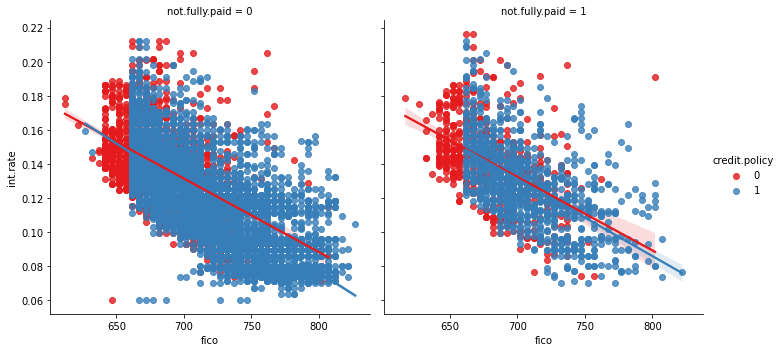

In [24]:
#trend differed between not.fully.paid and credit.policy
plt.figure(figsize=(16,8))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

# Predicting results using two ML models #

In [25]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [26]:
#purpose col is cathegorical, need to change it using get dummies
cat_feats = ['purpose']

In [27]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [28]:
# now to divide the data and train the model
from sklearn.model_selection import train_test_split
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#Decision tree model 

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print("Decision tree model\n")
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

#random forest model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print("\nRandom Forest Model\n")
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

Decision tree model

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.25      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.76      0.73      0.75      2874

[[2002  429]
 [ 333  110]]

Random Forest Model

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.62      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.74      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874

[[2425    6]
 [ 433   10]]
